## Descriptive Analysis

A notebook to describe the data set with simple statistical tools.

In [1]:
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, "C:\\Users\\Tomva\\OneDrive - Universidad Politécnica de Madrid\\EIT Digital Master Data Science Year 1\\Data Processes\\data_processes_mlcolonoscopy-feature_descriptive_analysis\\src")

import ml_colon

### Setting up Data Directory

In [2]:
data_dir = ml_colon.HERE.parents[2] / "data" 
print(data_dir)

assert data_dir.exists()

data_files = list(data_dir.glob("*.csv"))
print([f.name for f in data_files])

assert data_files

C:\Users\Tomva\OneDrive - Universidad Politécnica de Madrid\EIT Digital Master Data Science Year 1\Data Processes\data_processes_mlcolonoscopy-feature_descriptive_analysis\data
['data_description.csv', 'raw_data.csv']


### Loading Raw Data

In [3]:
_filepath = data_dir / "raw_data.csv"
df = pd.read_csv(_filepath)

# assert all rows have been loaded
len(df) == sum(1 for i in open(_filepath)) -1 # file has header

print(f"Raw data set has: {len(df)} rows")

Raw data set has: 16000 rows


In [4]:
descr_df = pd.read_csv(data_dir / "data_description.csv", index_col="column_name")

In [5]:
print(descr_df)

                                                         description
column_name                                                         
quality              a measure of the quality of the recorded video.
bits               number of bits used to encode that block in th...
intra_parts        number sub-blocks inside this block that are n...
skip_parts         number sub-blocks inside this block that are s...
inter_16x16_parts  number of sub-blocks inside this block making ...
inter_4x4_parts    number of sub-blocks inside this block making ...
inter_other_parts  number of sub-blocks inside this block making ...
non_zero_pixels    number of pixels different from 0 after encodi...
frame_width                  the width of the video frame in pixels.
frame_height                the height of the video frame in pixels.
movement_level     a measure of the level of movement of this fra...
mean                        mean of the pixels of the encoded block.
sub_mean_1         mean of the pix

Let's take a quick look at the datatypes in the dataframe

In [6]:
df.dtypes

quality                int64
bits                   int64
intra_parts            int64
skip_parts             int64
inter_16x16_parts      int64
inter_4x4_parts        int64
inter_other_parts      int64
non_zero_pixels        int64
frame_width            int64
frame_height           int64
movement_level         int64
mean                 float64
sub_mean_1           float64
sub_mean_2           float64
sub_mean_3           float64
sub_mean_4           float64
var_sub_blocks       float64
sobel_h              float64
sobel_v              float64
variance             float64
block_movement_h     float64
block_movement_v     float64
var_movement_h       float64
var_movement_v       float64
cost_1               float64
cost_2               float64
relevant             float64
dtype: object

In [7]:
df

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
0,22,2143,0,0,1,3,21,404,416,240,...,17.397461,17.397461,87.584335,2.820312,2.539062,10.772400,8.576599,0.0,0.0,1.0
1,22,1735,0,2,0,3,8,381,416,240,...,14.426758,14.233398,48.025330,1.843750,1.921875,6.163086,6.665771,8816.0,8801.0,1.0
2,22,1971,0,0,0,0,8,460,416,240,...,15.203125,13.953125,56.613480,3.000000,4.937500,1.625000,3.683594,5104.0,5193.0,1.0
3,22,2473,0,0,0,18,20,421,416,240,...,21.725586,29.165039,283.079285,2.078125,2.500000,25.806396,34.656250,21531.0,19802.0,1.0
4,22,1093,0,0,1,3,8,167,416,240,...,11.929688,14.353516,175.123245,3.070312,4.523438,22.252869,14.780701,15073.0,14549.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,37,66,16,1,1,9,1,3,2560,1600,...,1.432617,2.401367,6.652771,4.125000,13.437500,95.484375,975.058594,18704.0,18283.0,1.0
15996,37,100,32,0,0,18,2,8,2560,1600,...,2.844727,5.889648,15.255798,3.687500,0.000000,203.964844,0.000000,41738.0,37212.0,1.0
15997,37,141,16,1,0,0,4,15,2560,1600,...,7.579102,9.038086,50.865349,8.375000,16.375000,221.734375,816.109375,20642.0,17046.0,1.0
15998,37,335,16,0,2,6,2,38,2560,1600,...,21.457031,34.392578,310.964172,9.218750,29.843750,120.170898,1610.256836,125078.0,146935.0,1.0


Conclusion:
Looks like we are only dealing with numerical data (no characters, strings, datetimes, ...)

However, the int64 types seem to be discrete and may need special care.

### Missing Values?

Next, let's take a look if there are any Nulls, NaNs in the data set and if so how many.

In [8]:
_null_df = df.isnull().sum()

print(_null_df[_null_df > 0])
print(_null_df[_null_df > 0]/df.count()['relevant'] * 100)

sub_mean_3    14
cost_2        17
relevant       2
dtype: int64
sub_mean_3    0.087511
cost_2        0.106263
relevant      0.012502
dtype: float64


In [9]:
df[df['sub_mean_3'].isnull()]
df[df['cost_2'].isnull()]


,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
12677,22,955,32,0,1,9,1,149,2560,1600,...,18.488281,19.949219,152.754913,5.53125,19.906250,91.436523,1183.897461,17114.0,NaN,1.0
12678,22,975,48,0,0,6,2,168,2560,1600,...,14.674805,11.645508,49.091736,4.62500,0.281250,489.859375,2.452148,7218.0,NaN,1.0
12679,22,462,49,0,0,0,0,91,2560,1600,...,7.247070,6.616211,7.424801,0.00000,0.000000,0.000000,0.000000,11128.0,NaN,1.0
12680,22,707,0,0,0,0,8,100,2560,1600,...,23.753906,10.429688,153.405548,5.50000,11.062500,160.500000,571.183594,10106.0,NaN,1.0
12681,22,364,0,1,2,0,2,62,2560,1600,...,4.675781,4.513672,2.891677,1.50000,1.312500,1.625000,1.214844,5751.0,NaN,1.0
12682,22,1562,64,0,0,0,0,259,2560,1600,...,21.160156,26.898438,96.395508,0.00000,0.000000,0.000000,0.000000,13906.0,NaN,1.0
12683,22,692,48,0,0,0,2,124,2560,1600,...,13.141602,14.172852,56.796906,76.31250,19.500000,28909.339844,2041.125000,10594.0,NaN,1.0
13189,27,159,32,0,1,0,2,15,2560,1600,...,2.256836,3.766602,2.643555,31.37500,2.187500,2953.734375,15.527344,7352.0,NaN,1.0
13190,27,213,48,0,1,0,0,34,2560,1600,...,5.787109,6.691406,17.159939,1.37500,15.500000,13.234375,1681.750000,8156.0,NaN,1.0
13191,27,128,32,1,1,0,0,9,2560,1600,...,1.460938,1.548828,1.751709,0.25000,0.125000,0.437500,0.109375,3770.0,NaN,1.0


The missing values for sub_mean_3 and cost_2 maybe can be imputed / recovered.

For the target variable "relevant" not. It's probably best to drop these 2 rows as we later also want to exclude them from training / testing the model and its only a total of 2 rows...

In [10]:
df = df[~df.relevant.isnull()]
df = df[~df.sub_mean_3.isnull()]
df = df[~df.cost_2.isnull()]

(16000 - len(df))/16000 * 100
len(df)

15967

### Column Analysis

We want to go over each variable in the dataset and explore it with simple descriptive statistics.

A first overview can be seen here:

In [11]:
df.describe()

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
count,15967.000000,15967.000000,15967.000000,15967.000000,15967.000000,15967.000000,15967.000000,15967.000000,15967.000000,15967.000000,...,15967.000000,15967.000000,15967.000000,15967.000000,15967.000000,15967.000000,15967.000000,15967.000000,15967.000000,15967.000000
mean,29.511117,449.279952,11.028684,0.849815,0.995741,1.976765,3.684286,73.979082,1431.388238,849.572243,...,8.022259,8.267279,53.327234,8.008323,6.798490,834.594310,491.938240,36994.543120,42080.698315,0.822071
std,5.589634,548.832292,19.042909,1.182036,1.018669,3.899996,4.442187,102.541394,851.548551,529.939655,...,9.186959,9.555833,107.338446,17.229017,11.557873,3787.035669,2405.855987,38649.428603,43855.224007,0.382465
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,416.000000,240.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,832.000000,480.000000,...,0.889648,0.941406,1.411474,0.500000,0.500000,0.687500,0.746094,9947.000000,10973.000000,1.000000
50%,32.000000,243.000000,0.000000,0.000000,1.000000,0.000000,2.000000,33.000000,832.000000,480.000000,...,5.156250,5.304688,14.461300,2.625000,3.218750,11.683594,19.527344,23117.000000,26170.000000,1.000000
75%,37.000000,621.000000,16.000000,1.000000,2.000000,3.000000,6.000000,100.000000,1920.000000,1080.000000,...,11.613770,11.774902,52.449629,7.062500,8.062500,93.576050,96.066284,52138.500000,59911.500000,1.000000
max,37.000000,4771.000000,64.000000,4.000000,4.000000,33.000000,27.000000,828.000000,2560.000000,1600.000000,...,69.706055,66.775391,2022.197998,322.093750,189.000000,194634.750000,68389.359375,425705.000000,446306.000000,1.000000


,Description,count,mean,std,min,25%,50%,75%,max
quality,a measure of the quality of the recorded video.,15967.0,2.951112e+01,5.589634e+00,22.0,27.000000,32.000000,3.700000e+01,3.700000e+01
bits,number of bits used to encode that block in the video stream.,15967.0,4.492800e+02,5.488323e+02,0.0,71.000000,243.000000,6.210000e+02,4.771000e+03
intra_parts,number sub-blocks inside this block that are not encoded by making use of information in other frames.,15967.0,1.102868e+01,1.904291e+01,0.0,0.000000,0.000000,1.600000e+01,6.400000e+01
skip_parts,number sub-blocks inside this block that are straight-forward copied from another frame.,15967.0,8.498152e-01,1.182036e+00,0.0,0.000000,0.000000,1.000000e+00,4.000000e+00
inter_16x16_parts,number of sub-blocks inside this block making use of information in other frames and whose size is 16x16 pixels.,15967.0,9.957412e-01,1.018669e+00,0.0,0.000000,1.000000,2.000000e+00,4.000000e+00
inter_4x4_parts,number of sub-blocks inside this block making use of information in other frames and whose size is 4x4 pixels.,15967.0,1.976765e+00,3.899996e+00,0.0,0.000000,0.000000,3.000000e+00,3.300000e+01
inter_other_parts,number of sub-blocks inside this block making use of information in other frames and whose size is different from 16x16 and 4x4 pixels.,15967.0,3.684286e+00,4.442187e+00,0.0,0.000000,2.000000,6.000000e+00,2.700000e+01
non_zero_pixels,number of pixels different from 0 after encoding the block.,15967.0,7.397908e+01,1.025414e+02,0.0,5.000000,33.000000,1.000000e+02,8.280000e+02
frame_width,the width of the video frame in pixels.,15967.0,1.431388e+03,8.515486e+02,416.0,832.000000,832.000000,1.920000e+03,2.560000e+03
frame_height,the height of the video frame in pixels.,15967.0,8.495722e+02,5.299397e+02,240.0,480.000000,480.000000,1.080000e+03,1.600000e+03


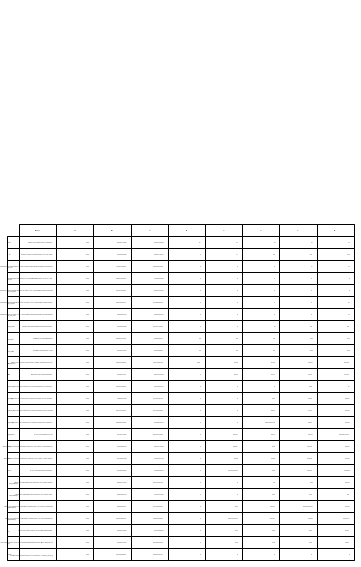

In [12]:
pd.set_option('display.max_colwidth', None)
from pandas.plotting import table 

df_des = df.describe().T
df_des['Description'] = ""

for col in df_des.index:
    df_des.loc[col, 'Description'] = descr_df.loc[col, 'description']

cols = df_des.columns.to_list()
col_order = cols[-1:] + cols[:-1] 
display(df_des[col_order])

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df_des[col_order])  # where df is your data frame

plt.savefig('descriptive_analysis.png')

In [13]:
import numpy as np
import six

def render_mpl_table(data, col_width=2.8, row_height=1, font_size=17,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [14]:
df_des[col_order].to_excel('table.xlsx')

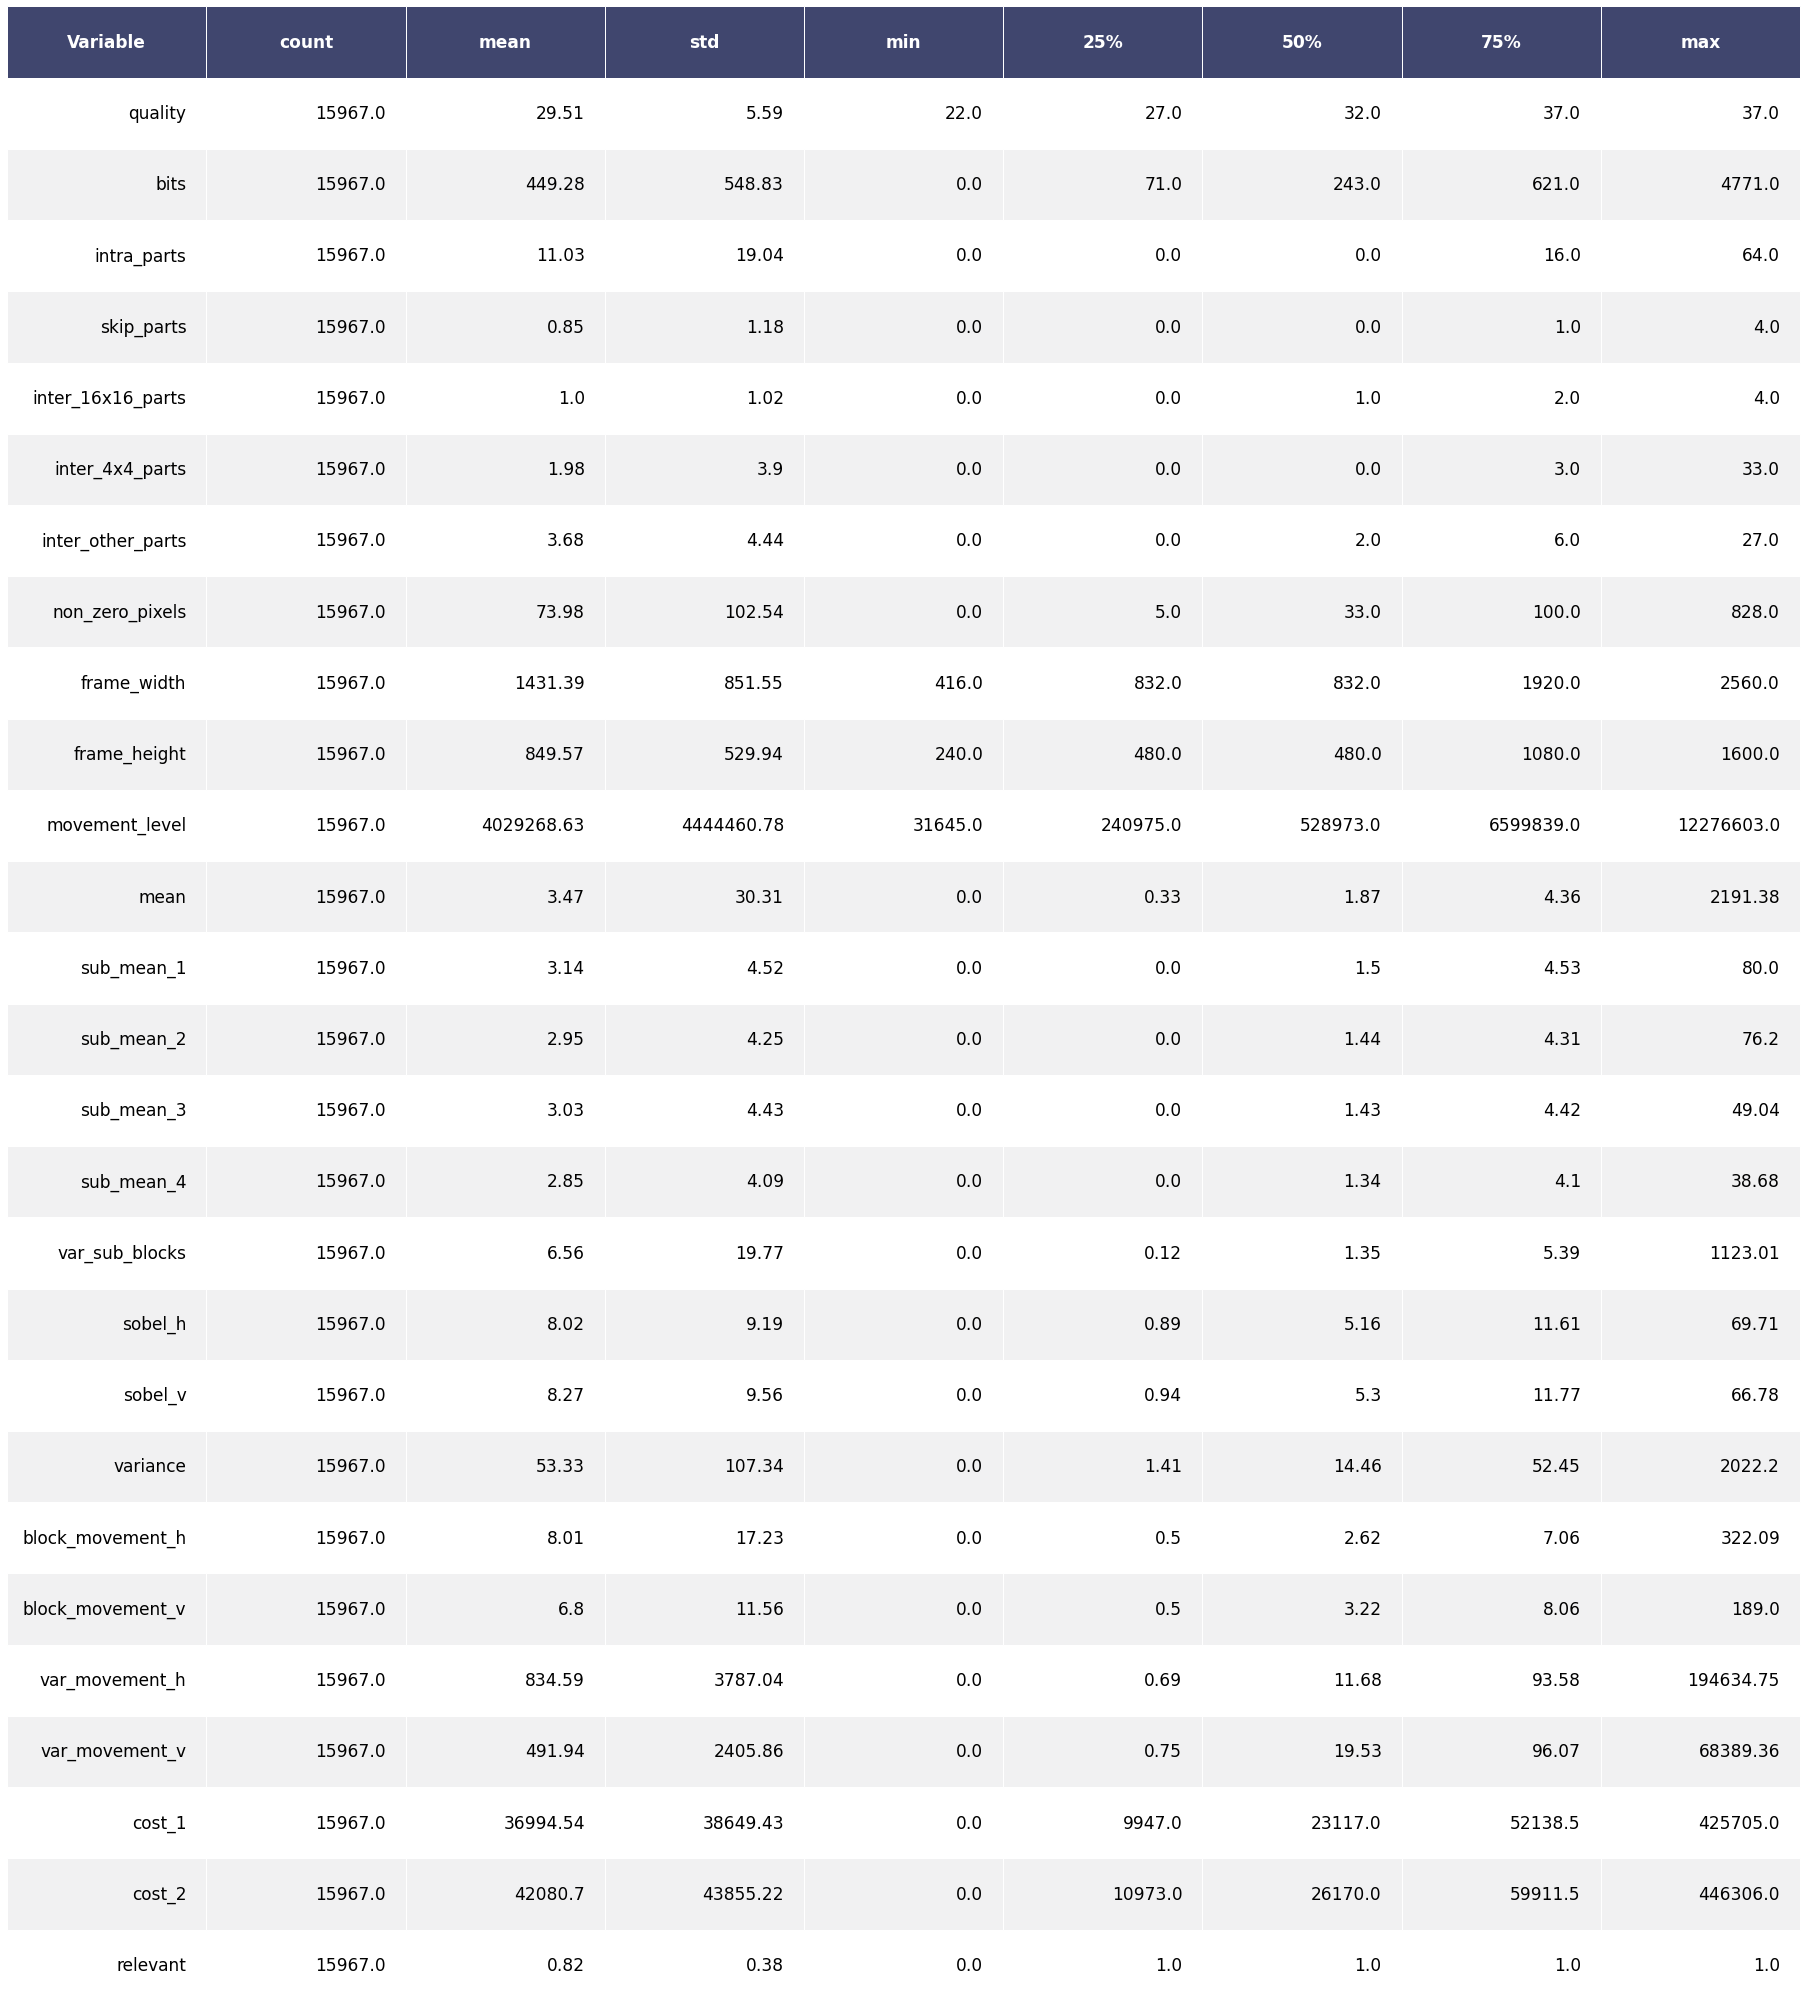

In [15]:
render_mpl_table(df.describe().T.round(2).reset_index().rename(columns={'index': 'Variable'}))
plt.tight_layout()
plt.savefig('descriptive_analysis.png')

#### Column: Quality

a measure of the quality of the recorded video.


<AxesSubplot:ylabel='Count'>

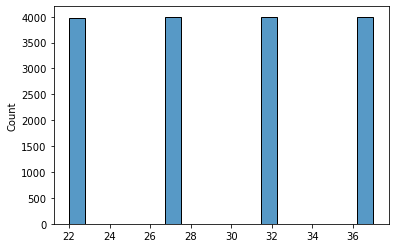

In [17]:
column_name = "quality"
print(descr_df.loc[column_name, "description"])

sns.histplot(df[column_name].values)

In [18]:
df[column_name].value_counts()

37    4000
32    4000
27    3986
22    3981
Name: quality, dtype: int64

Looks like a Discrete uniform distribution, but maybe data set was sampled in that way...


#### Column: Bits

In [19]:

column_name = "bits"
print(descr_df.loc[column_name, "description"])

number of bits used to encode that block in the video stream.


<AxesSubplot:title={'center':'Histogram of bits'}, ylabel='Count'>

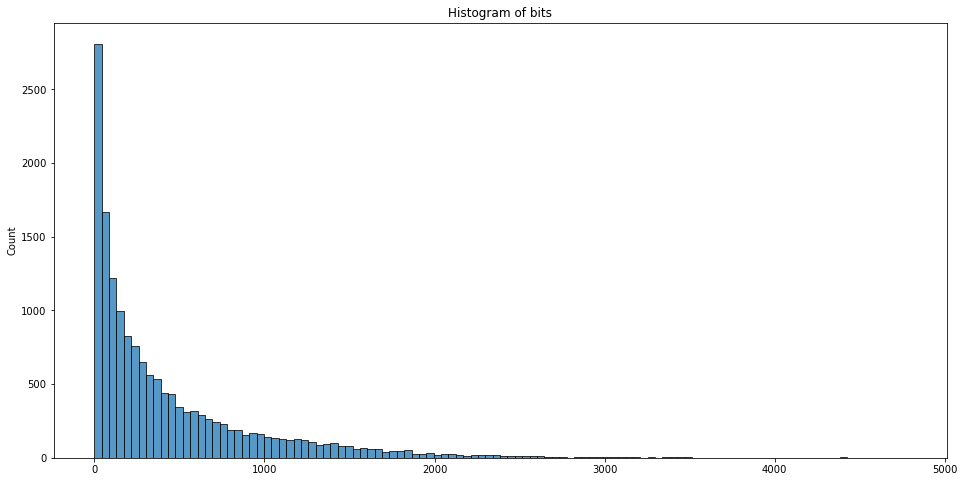

In [20]:

fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")

sns.histplot(df[column_name].values, ax=ax)

The distribution is highly skewed and it looks like most of the blocks are encoded using only a few bits.
This raises the question: Are there blocks that allegedly are encoded with 0 bits in the video stream?

Note: This should not be possible as 0 bits would mean 0 information in my opinion. 

In [21]:
print("Number of rows with 0 bits: ", len(df[df[column_name] ==0]))

Number of rows with 0 bits:  147


In [22]:
df[df[column_name] ==0].groupby('relevant').count()

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2
relevant,,,,,,,,,,,,,,,,,,,,,
0.0,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
1.0,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80


In [23]:
pd.cut(df[column_name], bins=[0, 8, 16, 32, 64, 124], include_lowest=False).value_counts(sort=False)

(0, 8]        695
(8, 16]       418
(16, 32]      962
(32, 64]     1493
(64, 124]    1818
Name: bits, dtype: int64

There are some block that are encoded with a very small number of bits. 696 rows are encoded with at most 8 bits. Will be interesting to see how quality depends on number of bits...For now we keep these rows but potentially these rows we have to deal with separately.

#### intra_parts

In [91]:
column_name = "intra_parts"
print(descr_df.loc[column_name, "description"])

number sub-blocks inside this block that are not encoded by making use of information in other frames.


Text(0.5, 0, '')

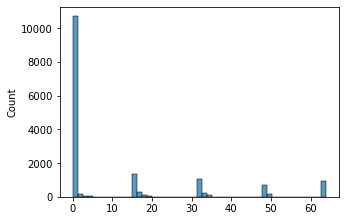

In [99]:
fig, ax = plt.subplots(figsize=(5,3.5))

#ax.set_title(f"Histogram of {column_name}")

sns.histplot(df[column_name].values, ax=ax)
plt.xlabel("")

In [26]:
df[column_name].value_counts(sort=False)

0     10293
16     1352
32     1056
48      714
64      917
1       440
17      280
33      198
49      175
2       177
18       97
34      115
3        45
19       55
4        53
Name: intra_parts, dtype: int64

The big majority of rows have 0 sub-blocks. Not sure if I yet understand what these sub-blocks are...

#### skip_parts

In [27]:
column_name = "skip_parts"
print(descr_df.loc[column_name, "description"])

number sub-blocks inside this block that are straight-forward copied from another frame.


<AxesSubplot:title={'center':'Histogram of skip_parts'}, xlabel='skip_parts', ylabel='Count'>

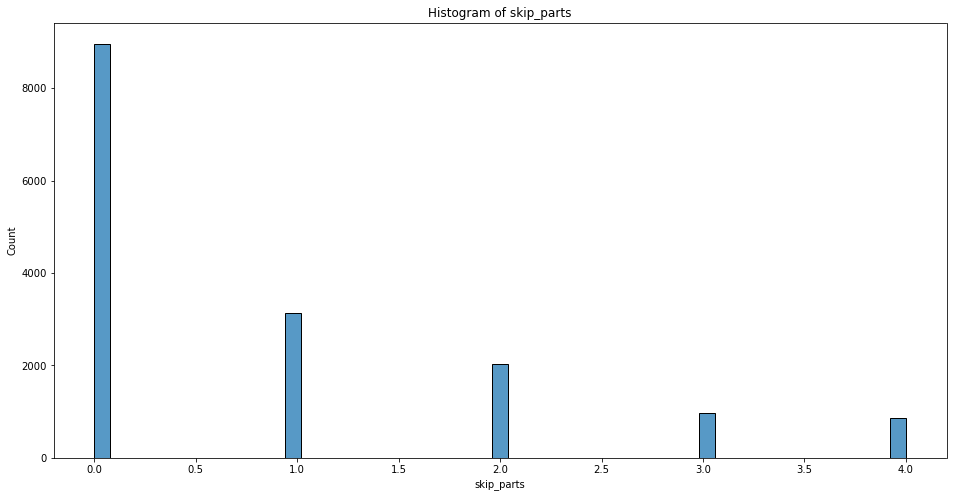

In [28]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

In [29]:
df.columns

Index(['quality', 'bits', 'intra_parts', 'skip_parts', 'inter_16x16_parts',
       'inter_4x4_parts', 'inter_other_parts', 'non_zero_pixels',
       'frame_width', 'frame_height', 'movement_level', 'mean', 'sub_mean_1',
       'sub_mean_2', 'sub_mean_3', 'sub_mean_4', 'var_sub_blocks', 'sobel_h',
       'sobel_v', 'variance', 'block_movement_h', 'block_movement_v',
       'var_movement_h', 'var_movement_v', 'cost_1', 'cost_2', 'relevant'],
      dtype='object')

## Addition by Tom
Building forward on the work of Jonathan. The sub-blocks are also not very clear to me. I think those are (a group of) pixels with certain information. 

#### Column: inter_16x16_parts

In [30]:
column_name = "inter_16x16_parts"
print(descr_df.loc[column_name, "description"])

number of sub-blocks inside this block making use of information in other frames and whose size is 16x16 pixels.


<AxesSubplot:title={'center':'Histogram of inter_16x16_parts'}, xlabel='inter_16x16_parts', ylabel='Count'>

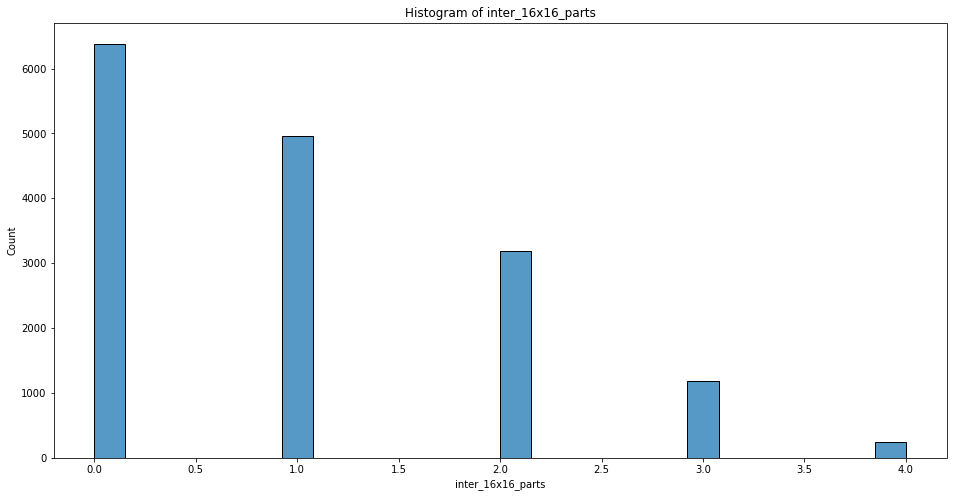

In [31]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

This is difficult to interpret. The description is not clear. 

#### Column: inter_4x4_parts

In [32]:
column_name = "inter_4x4_parts"
print(descr_df.loc[column_name, "description"])

number of sub-blocks inside this block making use of information in other frames and whose size is 4x4 pixels.


<AxesSubplot:title={'center':'Histogram of inter_4x4_parts'}, xlabel='inter_4x4_parts', ylabel='Count'>

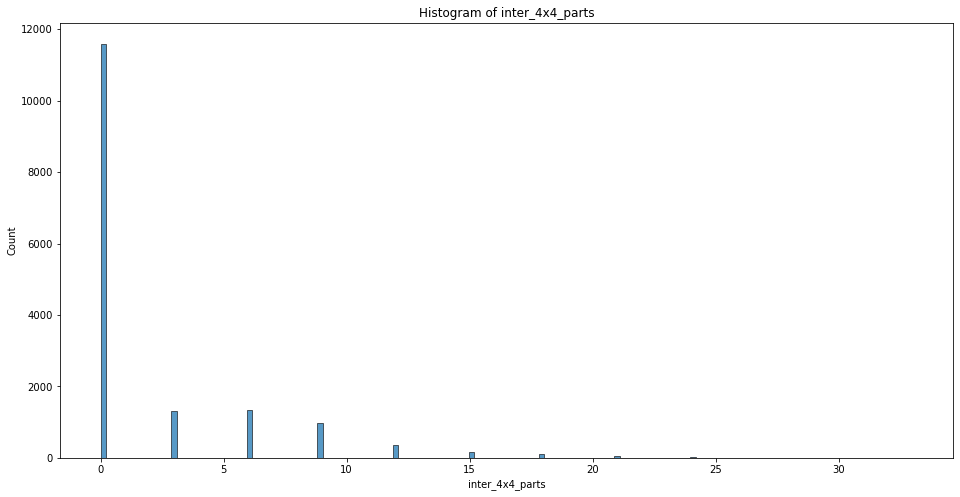

In [33]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

The above two plots have shown that bigger sub-blocks have less information overlap than small sub-blocks. 

#### Column: inter_other_parts

In [34]:
column_name = "inter_other_parts"
print(descr_df.loc[column_name, "description"])

number of sub-blocks inside this block making use of information in other frames and whose size is different from 16x16 and 4x4 pixels.


<AxesSubplot:title={'center':'Histogram of inter_other_parts'}, xlabel='inter_other_parts', ylabel='Count'>

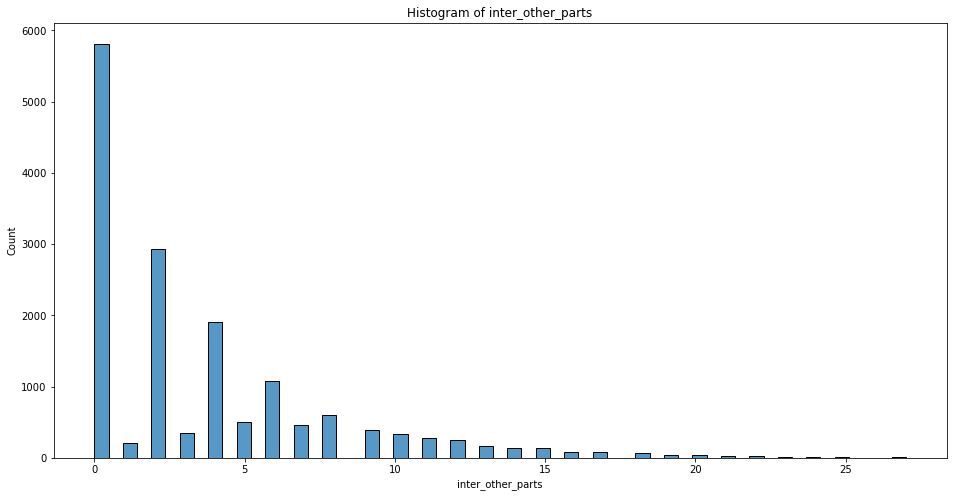

In [35]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### Target variable: relevant 

In [36]:
column_name = "relevant"
print(descr_df.loc[column_name, "description"])

the target variable that indicates whether the current block is relevant (1) or not (0)


In [37]:
print("Relevant == 1: ", len(df[df.relevant == 1]))
print("Relevant == 0: ",len(df[df.relevant == 0]))

print("Percentage where relevant is 1 out of all: ",len(df[df.relevant == 1])/ len(df))

Relevant == 1:  13126
Relevant == 0:  2841
Percentage where relevant is 1 out of all:  0.8220705204484249


Conclusion of relevant:

There is a high difference in the number of relevant blocks and irrelevant blocks. In the machine learning we may need to stratify the data to not favor the algorithm of predicting 1 all the time. If we do not take this into account, we can create a very simple algorithm already with 82% accuracy (just predict 1 all the time).

As the outcome variable is binary, we should look into methods of classification, e.g. logistic regression / decision tree / neural networks? 

## Relationships with target variable
In this section we will be looking for high discriminators to determine if a block is relevant. First we produce boxplots for every continuous variable. This could help to see if one group has a different mean/distribution than the other group in the variable relevant. 

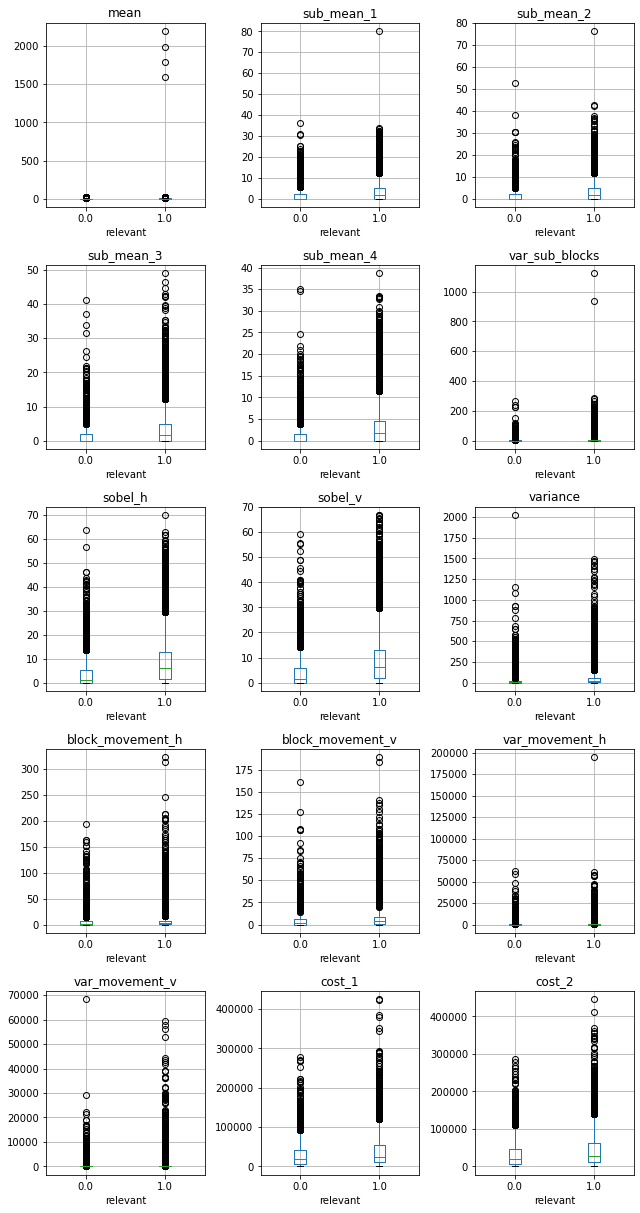

In [115]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(9,18))

for ax, y in zip(axes.flatten(), df.columns[11:-1]):
    df.boxplot(y, by='relevant', ax=ax)
    
plt.suptitle("")#Boxplots of continuous variables grouped by relevant", size=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('Boxplots_EDA.jpg')

There seem to be a lot of outliers for the different variables and groups. Some variables seem interesting as the mean of the two groups differs a bit. 

<AxesSubplot:xlabel='bits', ylabel='relevant'>

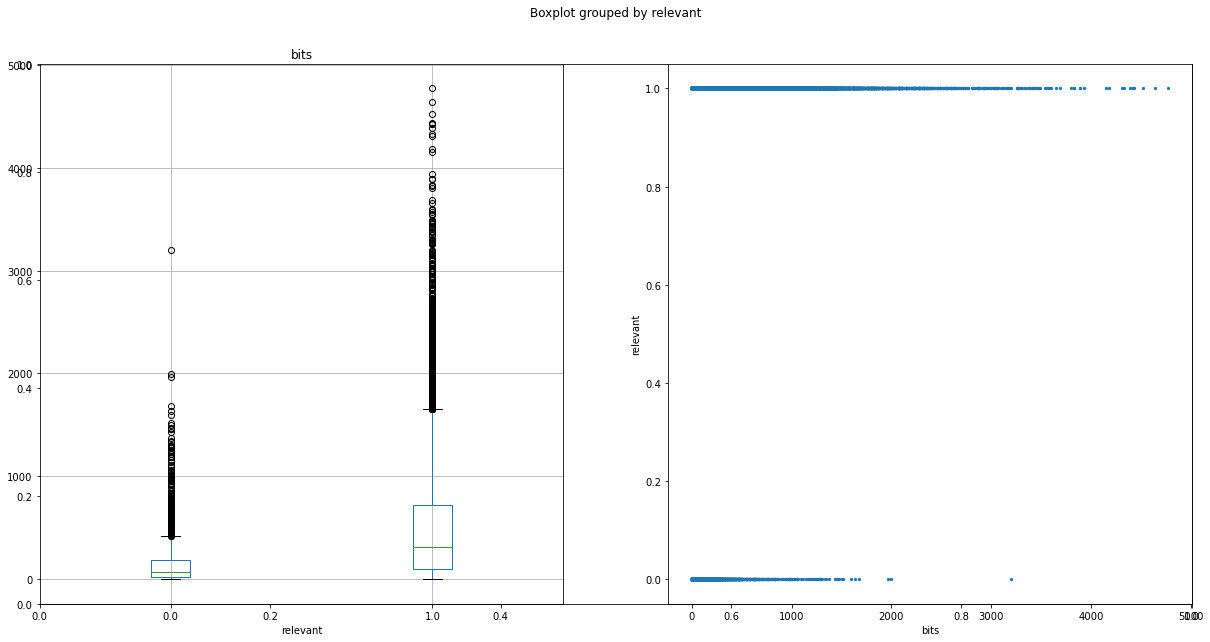

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
ax1 = fig.add_subplot(1, 2, 1)
df.boxplot('bits', by='relevant', ax=ax1)
ax2 = fig.add_subplot(1, 2, 2)
df.plot.scatter(x='bits', y='relevant', marker='.', ax=ax2)


<AxesSubplot:xlabel='intra_parts'>

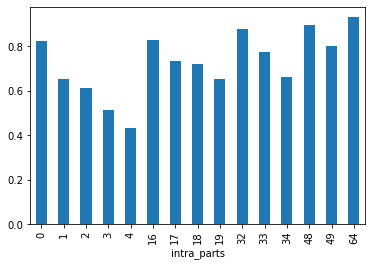

In [49]:
df.groupby('intra_parts').mean()['relevant'].plot(kind='bar')

<AxesSubplot:xlabel='skip_parts'>

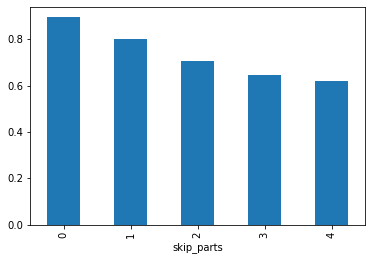

In [50]:
df.groupby('skip_parts').mean()['relevant'].plot(kind='bar')

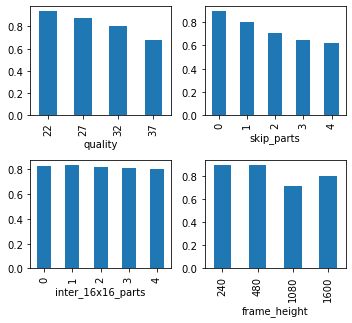

In [107]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5,5))
col_num = [0, 3, 4, 9]

for ax, y in zip(axes.flatten(), df.columns[col_num]):
    df.groupby(y).mean()['relevant'].plot(ax=ax, kind='bar')
    
plt.suptitle("")#Boxplots of continuous variables grouped by relevant", size=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('Categorical_Plots_EDA.jpg')

<AxesSubplot:xlabel='group'>

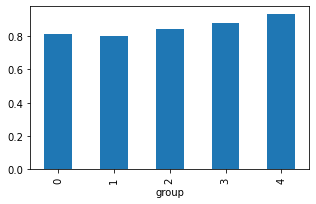

In [98]:
fig, ax = plt.subplots(figsize=(5,3))
new_df = df[['intra_parts', 'relevant']].copy()
new_df['group'] = new_df['intra_parts'] // 10 
new_df = new_df.replace({"group": {3: 2, 4:3, 6:4}})
new_df.groupby('group')['relevant'].mean().plot(kind='bar')

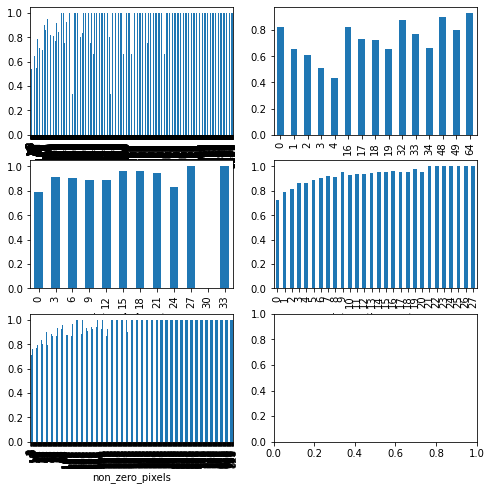

In [100]:
col_num  = [1, 2, 5, 6, 7]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

for ax, y in zip(axes.flatten(), df.columns[col_num]):
    #ax1 = fig.add_subplot(2,2,num+1)
    df.groupby(y).mean()['relevant'].plot(ax=ax, kind='bar')

In [114]:
from math import log
num= 7
sns.histplot(df[df.columns[num]]))

TypeError: cannot convert the series to <class 'float'>

In [102]:
df.columns[num]

'bits'

<AxesSubplot:title={'center':'bits'}, xlabel='relevant'>

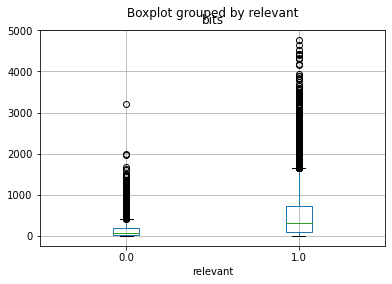

In [108]:
df.boxplot('bits', by='relevant')

Text(0.5, 0.98, '')

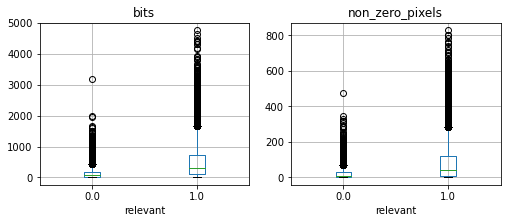

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
col_name = ['bits', 'non_zero_pixels']

for ax, y in zip(axes.flatten(), col_name):
    df.boxplot(y, by='relevant', ax=ax)
plt.suptitle("")